# ハイパースペクトラルセンサーデータの可視化
- [このページのJupyter Notebookファイル](https://amano-takahisa.github.io/rs_with_python/handson/plot_hyperspectral.ipynb)
- [google colaboratoryで開く](https://colab.research.google.com/github/amano-takahisa/rs_with_python/blob/master/docs/handson/plot_hyperspectral.ipynb)

ハイパースペクトラルセンサーデータを用いて、Pythonでの基本的なデータ処理について学びます。

センサーデータのCSVから、以下のようなグラフと各測定でのNDVIの値を算出します。

![out](https://github.com/amano-takahisa/rs_with_python/raw/master/source/handson/out/spectral.png)

利用するデータは、[こちら](data/spectrum2019.csv)。ダウンロードの上、`data`フォルダに保存してください。

## CSVファイルの読み込み
CSVやエクセルなどに保存された表敬式のデータを扱うには、**Pandas**というライブラリを利用します。  
[Pandasの公式ドキュメントはこちら](https://pandas.pydata.org/pandas-docs/stable/index.html)

Pandasでは表形式のデータを**DataFrame**と呼ばれる形で保持し、必要な処理を行っていきます。

まずはPandasを用いてデータを読み込んでみましょう。

In [1]:
import pandas as pd  # pandasをpdという別名で呼び出す

# csvファイルを読み込み、dfという変数に代入する
df = pd.read_csv('data/spectrum2019.csv')
df  # dfの中身を表示

,DATE,12/17/2019,12/17/2019.1,12/17/2019.2,12/17/2019.3
0,TIME,13:08:32,13:07:44,13:06:19,13:04:52
1,Model Number,MS-730,MS-730,MS-730,MS-730
2,Serial Number,21151,21151,21151,21151
3,Calibration Value,Available,Available,Available,Available
4,Measurement mode,Single,Single,Single,Single
...,...,...,...,...,...
5043,1112.93,0,0,0,0
5044,1113.24,0,0,0,0
5045,1113.55,0,0,0,0
5046,1113.86,0,0,0,0


各業の意味はコメントに記載のとおりです。
Pandasライブラリには、今回利用したCSVファイルを読み込むための`read_csv()`メソッド(関数)の他にも、エクセルファイルを読み込むための`read_excel()`、クリップボードからデータを読み込む`read_clipboard()`などのメソッドが用意されています。詳しくは[Pandas API reference](https://pandas.pydata.org/pandas-docs/stable/reference/io.html)で確認してください。

データは、dfに`DataFrame`というクラスで代入されています。

In [2]:
# オブジェクトタイプの確認
type(df)

pandas.core.frame.DataFrame

また、表示されるテーブルの最後に、`5048 rows × 5 columns`と表示があり、CSVデータは5,048行、5列のデータであることがわかります。

このCSVデータは、列ごとに各観測が保存され、46行目までにメタデータ、47行目以降が各観測の波長ごとの放射照度(分光放射照度)の値が保存されています。また、2,548行目から別の測定が保存されています。

今回はメタデータ部分を飛ばして、かつ2,547行目までの放射照度の値のみを読み込んだデータフレームを作成します。

In [3]:
irrad = pd.read_csv('data/spectrum2019.csv', nrows=2500, skiprows=47)
irrad

,Wavelength[nm],Spectral Irradiance[W/m^2/nm],Spectral Irradiance[W/m^2/nm].1,Spectral Irradiance[W/m^2/nm].2,Spectral Irradiance[W/m^2/nm].3
0,294.00,0,0,0.0,0.0
1,294.34,0,0,0.0,0.0
2,294.68,0,0,0.0,0.0
3,295.02,nodata,nodata,0.0,0.0
4,295.37,0,0,NaN,0.0
...,...,...,...,...,...
2495,1112.93,0,0,0.0,0.0
2496,1113.24,0,0,0.0,0.0
2497,1113.55,0,0,0.0,0.0
2498,1113.86,0,0,0.0,0.0


`skiprows=n`オプションを与えることで、ファイルのはじめのn行を飛ばして読み込むことができました。その他のオプションは[公式ドキュメント](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)を参照してください。


## データのクリーニング

読み込んだデータをプロットする前に、データのクリーニングとして以下を実施します。
- カラム名の変更
- 欠損値の設定

### カラム名の変更
まずはカラムの名前が長すぎて扱いづらいので変更します。

In [4]:
col_names = ['WaveLength','obs1','obs2','obs3','obs4']
irrad.columns = col_names
irrad

,WaveLength,obs1,obs2,obs3,obs4
0,294.00,0,0,0.0,0.0
1,294.34,0,0,0.0,0.0
2,294.68,0,0,0.0,0.0
3,295.02,nodata,nodata,0.0,0.0
4,295.37,0,0,NaN,0.0
...,...,...,...,...,...
2495,1112.93,0,0,0.0,0.0
2496,1113.24,0,0,0.0,0.0
2497,1113.55,0,0,0.0,0.0
2498,1113.86,0,0,0.0,0.0


### データ型の変更
次に、データ型の変更です。

データフレームに格納されるデータは、同じ列の値がすべて同じ型のであることが必要です。今回は数値としてデータを扱いたいため、すべての列を浮動小数点のデータとして読み込みます。
まず、以下のコードで各列がどのような型で読み込まれているかを確認します。



In [5]:
irrad.dtypes

WaveLength    float64
obs1           object
obs2           object
obs3          float64
obs4          float64
dtype: object

`read_csv()`関数は、各列に最適なデータ型を認識して読み込みます。読み込むデータに"NA"という文字列や値が無いセルは欠損値と認識し、浮動小数点のNaNという値に変換されます。
WaveLength、obs3、obs4の列はすべて数値(float64)として読み込むことができました。

obs1、obs2の列は、CSVファイルには数値の代わりに`nodata`の文字列が保存されている箇所があり、すべての値を数値に変換することができませんでした。
そのため、データフレームの各列は**object**の型で保持されています。

以下で、この数値に変換できなかった値を強制的にNaNへ変換し、すべての列を浮動小数点の型とすることができます。

In [6]:
irrad = irrad.apply(pd.to_numeric, args=('coerce',))
print(irrad.dtypes)
irrad

WaveLength    float64
obs1          float64
obs2          float64
obs3          float64
obs4          float64
dtype: object


,WaveLength,obs1,obs2,obs3,obs4
0,294.00,0.0,0.0,0.0,0.0
1,294.34,0.0,0.0,0.0,0.0
2,294.68,0.0,0.0,0.0,0.0
3,295.02,NaN,NaN,0.0,0.0
4,295.37,0.0,0.0,NaN,0.0
...,...,...,...,...,...
2495,1112.93,0.0,0.0,0.0,0.0
2496,1113.24,0.0,0.0,0.0,0.0
2497,1113.55,0.0,0.0,0.0,0.0
2498,1113.86,0.0,0.0,0.0,0.0


すべてのカラムが浮動小数点に変換されました。  先程`nodata`と表示されていた箇所も、`NaN`と表示されています。

### 基本統計量の確認
データフレームに保存されているデータの概要は、`describe()`メソッドで確認することができます。

In [7]:
irrad.describe()

,WaveLength,obs1,obs2,obs3,obs4
count,2500.000000,2498.000000,2499.000000,2498.000000,2499.000000
mean,710.684948,0.000609,0.000877,0.000186,0.000648
std,237.214209,0.000588,0.000587,0.000285,0.000494
min,294.000000,-0.000030,-0.000551,-0.001032,-0.001259
25%,505.997500,0.000285,0.000437,0.000000,0.000161
50%,713.985000,0.000522,0.000895,0.000065,0.000732
75%,917.030000,0.000761,0.001304,0.000327,0.001090
max,1114.170000,0.004639,0.003810,0.001553,0.001641


DataFrameクラスが持つ`count()`や`mean()`、`std()`などのメソッドを用いると、上記の基本統計量を個別に算出することができます。

In [8]:
print(irrad.mean())
print(irrad.std())

WaveLength    710.684948
obs1            0.000609
obs2            0.000877
obs3            0.000186
obs4            0.000648
dtype: float64
WaveLength    237.214209
obs1            0.000588
obs2            0.000587
obs3            0.000285
obs4            0.000494
dtype: float64


`mean()`では、各カラムの平均値が、`std()`では各カラムの標準偏差の値が算出されていることが確認できます。

### 欠損値の設定
`irrad`のWaveLengthが400から403の値のデータを確認してみます。

In [9]:
wl_min = 400
wl_max = 403
irrad[(wl_min < irrad['WaveLength']) & (irrad['WaveLength'] < wl_max)]

,WaveLength,obs1,obs2,obs3,obs4
312,400.31,0.000690,0.001017,-0.000031,0.000625
313,400.65,0.000623,0.001020,-0.000022,0.000661
314,400.99,0.000633,0.001079,-0.000018,0.000709
315,401.33,0.000710,0.001178,0.000012,0.000696
316,401.67,0.000628,0.001059,0.000028,0.000712
317,402.01,0.000550,0.000920,0.000011,0.000704
318,402.35,0.000554,0.000950,-0.000013,0.000721
319,402.69,0.000584,0.000959,-0.000004,0.000720


いくつかの分光放射照度の値が負になっていることが確認できますが、分光放射照度は負の値を取らないため、これらは測定ノイズであると考えられます。

今回は負の値になった箇所を、欠損値であることを示す`NaN`で埋めていきます。

In [10]:
# WaveLength以外のカラム名を設定
target_columns = irrad.columns.drop('WaveLength')

# target_columnsの値が負のセルをマスク
irrad[target_columns] =  irrad[target_columns].mask(irrad[target_columns] < 0)

# 上記のセルと同じ箇所を表示
irrad[(wl_min < irrad['WaveLength']) & (irrad['WaveLength'] < wl_max)]

,WaveLength,obs1,obs2,obs3,obs4
312,400.31,0.000690,0.001017,NaN,0.000625
313,400.65,0.000623,0.001020,NaN,0.000661
314,400.99,0.000633,0.001079,NaN,0.000709
315,401.33,0.000710,0.001178,0.000012,0.000696
316,401.67,0.000628,0.001059,0.000028,0.000712
317,402.01,0.000550,0.000920,0.000011,0.000704
318,402.35,0.000554,0.000950,NaN,0.000721
319,402.69,0.000584,0.000959,NaN,0.000720


再度、データフレームの基本統計量を確認します。

In [11]:
irrad.describe()

,WaveLength,obs1,obs2,obs3,obs4
count,2500.000000,2496.000000,2480.000000,2087.000000,2371.000000
mean,710.684948,0.000609,0.000884,0.000241,0.000692
std,237.214209,0.000588,0.000583,0.000274,0.000464
min,294.000000,0.000000,0.000000,0.000000,0.000000
25%,505.997500,0.000286,0.000446,0.000026,0.000238
50%,713.985000,0.000522,0.000898,0.000100,0.000771
75%,917.030000,0.000761,0.001307,0.000420,0.001104
max,1114.170000,0.004639,0.003810,0.001553,0.001641


最小値が0になり、その他の統計量も若干変化したことが確認できます。

## グラフへのプロット

上で作成したデータフレームをグラフにプロットしましょう。DataFrameクラスにある[plot()](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html)メソッドでプロットしてみます。

引数xにx軸としたいカラムの名前を指定します。

<AxesSubplot:xlabel='WaveLength'>

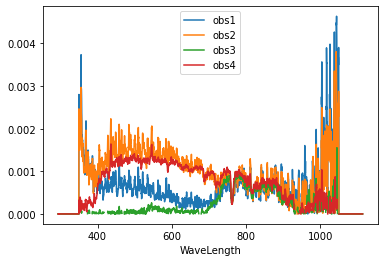

In [12]:
irrad.plot(x='WaveLength')

DataFrameのplot()メソッドで描画される図はmatplotlibと組み合わせて使うこともできます。

グラフに可視光と近赤外線の範囲を重ね合わせて表示してみましょう。

今回は[Landsat 8に積まれているセンサーと同じ波長](https://www.usgs.gov/faqs/what-are-band-designations-landsat-satellites)でRGBと近赤外線(NIR)の波長域を設定してみます。

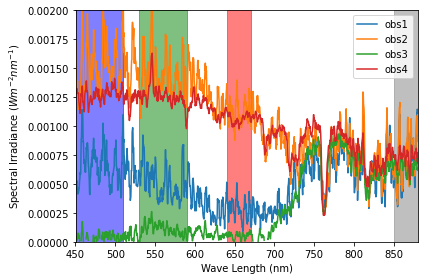

In [13]:
# matplotlibのインポート
import matplotlib.pyplot as plt

# 波長域の定義
wave_length = {'Blue':  {'range':(450, 510), 'color':'Blue'},
               'Green': {'range':(530, 590), 'color':'Green'},
               'Red':   {'range':(640, 670), 'color':'Red'},
               'NIR':   {'range':(850, 880), 'color':'Gray'}}

# plot範囲の定義
plot_xlim = (wave_length['Blue']['range'][0],
             wave_length['NIR']['range'][1]) 

plot_ylim = (0, 0.002) 

# プロットオブジェクトの初期化
fig, ax = plt.subplots()

# 各バンドの範囲をプロット
for band in wave_length:
    ax.axvspan(*wave_length[band]['range'],
               color=wave_length[band]['color'],
               alpha=0.5)

# グラフをプロット
irrad.plot(x='WaveLength', ax=ax, xlim=plot_xlim, ylim=plot_ylim)

# グラフのタイトル等をプロット
ax.set_xlabel(r'Wave Length (nm)')
ax.set_ylabel(r'Spectral Irradiance ($W m^{-2} nm^{-1}$)')


plt.tight_layout()

# 'out'フォルダに画像として保存
plt.savefig('out/spectral.png')


# 画面へ表示
plt.show()

## NDVIの計算
NDVIは植生の状態をよく反映する指標で、以下の式で定義されます。
$$
    NDVI = \frac{近赤外線(NIR)の反射率 - 赤色(Red)の反射率}{近赤外線(NIR)の反射率 + 赤色(Red)の反射率}
$$

マルチスペクトルメータの場合、近赤外の反射率に相当するものは、上記の図の灰色の範囲の平均値、同様に赤色の反射率は赤色の範囲の平均値となります。今回のようなノイズが多いデータの場合、平均値より中央値を用いる方が良いでしょう。

ここからNDVIを算出するため、以下の手順を行います。
- 各バンドにおける中央値の計算
- NDVIの計算

### バンドごとの中央値の計算
作成したデータフレームから、特定のWave Lengthの範囲における各バンドの値の中央値は、以下の手順で求めることができる。
1. Wabe Lengthが、赤色の範囲である行のみをデータフレームから抜き出す。
2. 抜き出してできる新たなデータフレームの列ごとの平均値(中央値)を求める。
3. 上記1,2をNIRについても行う。

#### 行の抽出
データフレームから行番号を指定して特定の行を抜き出すには、`df[0:5]`のような形で行の範囲を指定します。

In [14]:
irrad_part = irrad[0:8]
irrad_part

,WaveLength,obs1,obs2,obs3,obs4
0,294.00,0.0,0.0,0.0,0.0
1,294.34,0.0,0.0,0.0,0.0
2,294.68,0.0,0.0,0.0,0.0
3,295.02,NaN,NaN,0.0,0.0
4,295.37,0.0,0.0,NaN,0.0
5,295.71,0.0,0.0,0.0,0.0
6,296.05,NaN,0.0,NaN,0.0
7,296.39,0.0,0.0,0.0,0.0


また、`0:5`の代わりに、`[True, False, False, ...]`のようなブール値の入ったリストを与えると、`True`の行を抽出することができます。(`[]`が入れ子担っていることに注意。)

In [15]:
irrad_part[[True, False, True, False, False, True, False, True]]

,WaveLength,obs1,obs2,obs3,obs4
0,294.00,0.0,0.0,0.0,0.0
2,294.68,0.0,0.0,0.0,0.0
5,295.71,0.0,0.0,0.0,0.0
7,296.39,0.0,0.0,0.0,0.0


更に、以下のようにカラムを抽出し条件式に当てはめると、N番目の行が条件を満たす場合`True`、満たさない場合`False`が入った**Series**を作成することができ、このSeriesも上記のリスト同様に行の抽出に使うことができます。

In [16]:
# データフレームからのカラムの抽出
irrad_part['WaveLength']

0    294.00
1    294.34
2    294.68
3    295.02
4    295.37
5    295.71
6    296.05
7    296.39
Name: WaveLength, dtype: float64

In [17]:
# Bool値の入ったSeriesの作成
irrad_part['WaveLength'] < 296

0     True
1     True
2     True
3     True
4     True
5     True
6    False
7    False
Name: WaveLength, dtype: bool

このBool値が入ったSeriesは、`&`や`|`で結合することで、複数の条件を満たす新たなBool値のSeriesを作成することができます。

In [18]:
(294 < irrad_part['WaveLength'] ) & (irrad_part['WaveLength'] < 296)

0    False
1     True
2     True
3     True
4     True
5     True
6    False
7    False
Name: WaveLength, dtype: bool

以上を組み合わせて、赤色の波長範囲の分光放射照度のみのデータフレームは以下のように作成できます。

In [19]:
# Bool値のSeriesを作る
selector = (wave_length['Red']['range'][0] < irrad['WaveLength']) & (irrad['WaveLength'] < wave_length['Red']['range'][1])
# Seriesでデータフレームを抽出する
irrad_red = irrad[selector]
irrad_red

,WaveLength,obs1,obs2,obs3,obs4
1026,640.10,0.000515,0.001366,0.000079,0.001136
1027,640.43,0.000477,0.001336,0.000061,0.001128
1028,640.77,0.000384,0.001217,0.000038,0.001123
1029,641.10,0.000328,0.001166,0.000051,0.001110
1030,641.43,0.000342,0.001139,0.000059,0.001093
...,...,...,...,...,...
1112,668.60,0.000357,0.001238,0.000069,0.001107
1113,668.94,0.000361,0.001303,0.000105,0.001090
1114,669.27,0.000306,0.001202,0.000082,0.001090
1115,669.60,0.000298,0.001154,0.000094,0.001066


NIRについても同様にデータフレームを作成できます。

In [20]:
selector = (wave_length['NIR']['range'][0] < irrad['WaveLength']) & (irrad['WaveLength'] < wave_length['NIR']['range'][1])
irrad_nir = irrad[selector]
irrad_nir

,WaveLength,obs1,obs2,obs3,obs4
1667,850.28,0.000484,0.000575,0.000674,0.000728
1668,850.60,0.000505,0.000573,0.000680,0.000750
1669,850.93,0.000613,0.000674,0.000698,0.000735
1670,851.25,0.000616,0.000693,0.000708,0.000741
1671,851.57,0.000542,0.000632,0.000740,0.000713
...,...,...,...,...,...
1755,878.70,0.001017,0.001043,0.000736,0.000776
1756,879.02,0.001117,0.001085,0.000671,0.000732
1757,879.34,0.001058,0.000997,0.000623,0.000771
1758,879.67,0.001146,0.001066,0.000637,0.000693


#### 中央値の計算
基本統計量の確認の際に示した`mean()`と同様に、DataFrameが持つ`median()`メソッドにより各カラムの中央値が計算できます。

In [21]:
red_median = irrad_red.median()
red_median

WaveLength    655.030000
obs1            0.000289
obs2            0.001139
obs3            0.000057
obs4            0.001069
dtype: float64

In [22]:
nir_median = irrad_nir.median()
nir_median

WaveLength    865.150000
obs1            0.000686
obs2            0.000739
obs3            0.000652
obs4            0.000738
dtype: float64

### NDVIの計算
作成したSeriesからNDVIの計算に不要な`WaveLength`の値を抜いておきます。

In [23]:
red_median = red_median.drop('WaveLength')
nir_median = nir_median.drop('WaveLength')

Seriesは要素数が同じ場合、四則演算は各要素ごとに行われます。これを分配法則といいます。このため、各obsにおけるNDVIは定義式のようにSeriesを計算することにより求めることができます。

In [24]:
NDVI = (nir_median - red_median)/(nir_median + red_median)
NDVI

obs1    0.407179
obs2   -0.212833
obs3    0.838951
obs4   -0.182955
dtype: float64

以上でNDVIの算出ができました。